# About Dataset
Description: This dataset contains sales data for a retail store during the Diwali festival period in India. The data includes information on the products sold, their categories, the sales channels, the dates and times of sale, the sale prices, and the quantities sold.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("/kaggle/input/diwali-sales/Diwali Sales Data.csv", encoding= 'unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# Data Wrangling

In [3]:
df.shape

(11251, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [6]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [7]:
# as we have last two columns useless, so we have to remove it form datadf
df = df.drop(["Status", "unnamed1"], axis=1)

In [8]:
# dorp null values from Amount
df = df.dropna(subset=["Amount"], axis = 0)

In [9]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [10]:
# check the duplicates
df.duplicated().sum()

8

In [11]:
# remove duplicates
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
# change the type of Amount
df["Amount"] = df["Amount"].astype('int')

In [14]:
# check the unique values in each columns
df.nunique()

User_ID             3752
Cust_name           1250
Product_ID          2350
Gender                 2
Age Group              7
Age                   81
Marital_Status         2
State                 16
Zone                   5
Occupation            15
Product_Category      18
Orders                 4
Amount              6583
dtype: int64

# Visualize the insights using plots

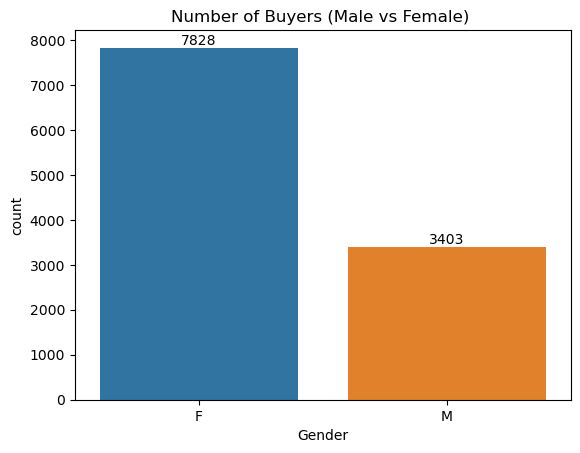

In [15]:
# check how many males and females purchased products
ax = sns.countplot(data = df, x="Gender")
plt.title("Number of Buyers (Male vs Female) ")
for bars in ax.containers:
    ax.bar_label(bars)

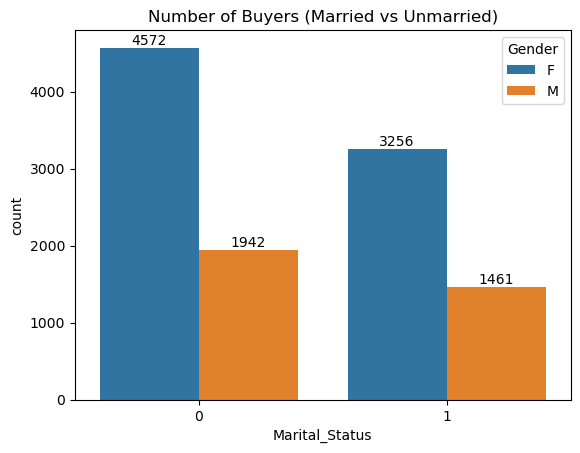

In [16]:
ax = sns.countplot(data = df, x="Marital_Status", hue="Gender")
plt.title("Number of Buyers (Married vs Unmarried)")
for bars in ax.containers:
    ax.bar_label(bars)

- As we see above two graphs, there is total 11231 male and female purchased products during diwali festival.
- In this festival, mostly female purchased diwali products as we see in the first plot, there is 7828 female and 3403 male appears in purchasing products
- When we see it according to marital status in the 2nd plot, there is also mostly female either married or unmarried appears in buying products as compare to men.

In [17]:
sales_gend = df.groupby(df['Gender'], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sales_gend

,Gender,Amount
0,F,74307679
1,M,31871146


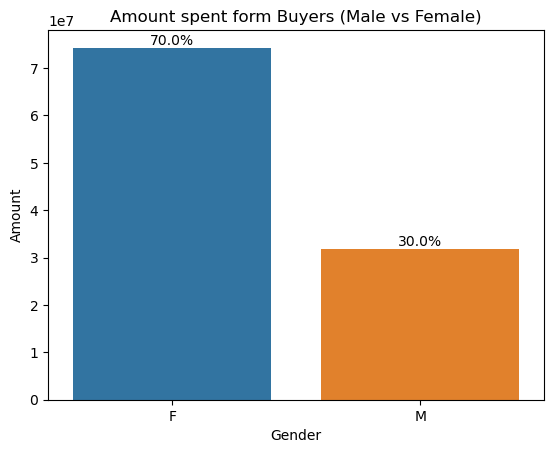

In [18]:
fig = sns.barplot(data = sales_gend, x="Gender", y="Amount")
plt.title("Amount spent form Buyers (Male vs Female)")

total = sum(sales_gend["Amount"])
for i, v in enumerate(sales_gend["Amount"]):
    percentage= v / total *100
    plt.text(i, v, f'{percentage:.1f}%', ha="center", va="bottom")

- As we see that in this festival, total amount spent by female is much more than male, as female spent 74307679 indrs and male spent 31871146 indrs 

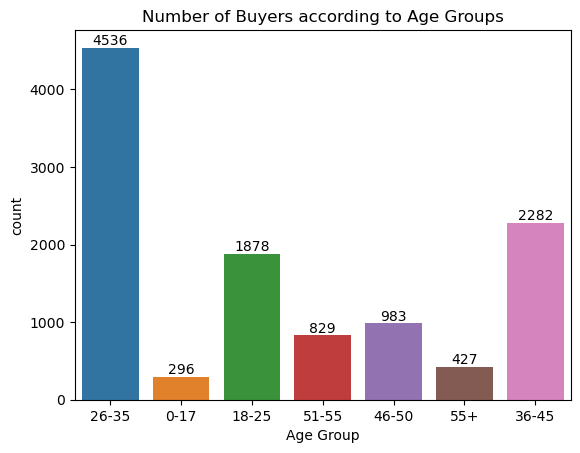

In [19]:
# Check how many people purchased products according to age groups
fig = sns.countplot(data = df, x="Age Group")
plt.title("Number of Buyers according to Age Groups")
for bars in fig.containers:
    fig.bar_label(bars)

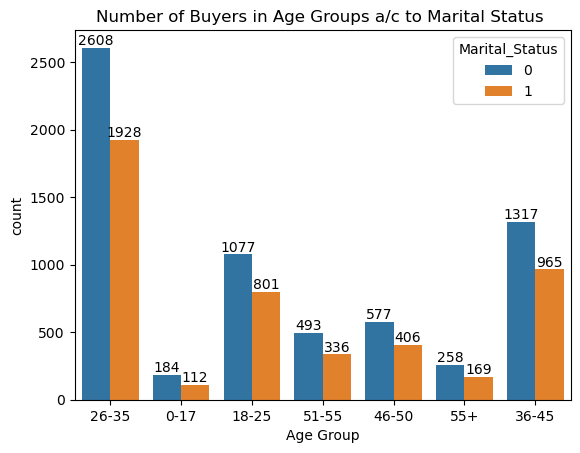

In [20]:
fig = sns.countplot(data = df, x="Age Group", hue="Marital_Status")
plt.title('Number of Buyers in Age Groups a/c to Marital Status ')
for bars in fig.containers:
    fig.bar_label(bars)

In [21]:
# Amount spent by Age Groups
age_amount = df.groupby(df["Age Group"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
age_amount

,Age Group,Amount
2,26-35,42581767
3,36-45,22135135
1,18-25,17235530
4,46-50,9207844
5,51-55,8237909
6,55+,4080987
0,0-17,2699653


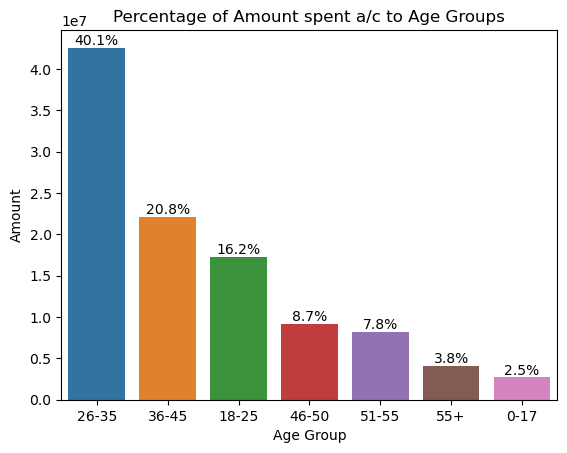

In [22]:
fig = sns.barplot(data = age_amount, x="Age Group", y="Amount")
plt.title('Percentage of Amount spent a/c to Age Groups')
total = sum(age_amount["Amount"])
for i, v in enumerate(age_amount["Amount"]):
    percentage = v/total *100
    plt.text(i, v, f'{percentage:.1f}%', ha="center", va="bottom")

In [23]:
ag_orders = df.groupby(["Age Group"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False)
ag_orders

,Age Group,Orders
2,26-35,11378
3,36-45,5683
1,18-25,4646
4,46-50,2371
5,51-55,2111
6,55+,1076
0,0-17,690


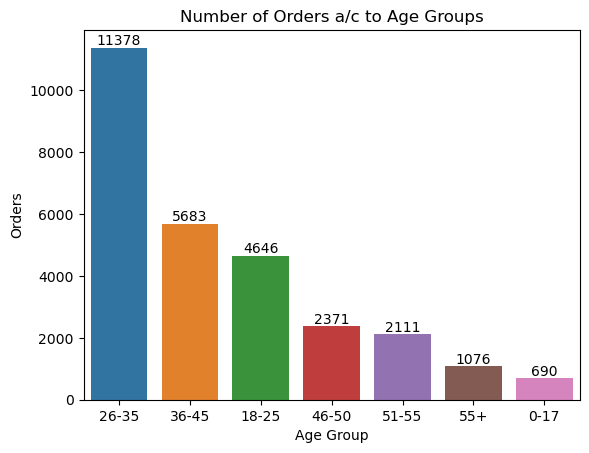

In [24]:
fig = sns.barplot(data = ag_orders, x="Age Group", y="Orders")
plt.title("Number of Orders a/c to Age Groups")
for bars in fig.containers:
    fig.bar_label(bars)

- As we see above two plots that the people having age b/w 26-35 are mostly buy diwali products and spent amount 40% from total amount and 36-45 spent almost 21% amount.
- Unmarried people mostly orders and spent amount in diwali products.

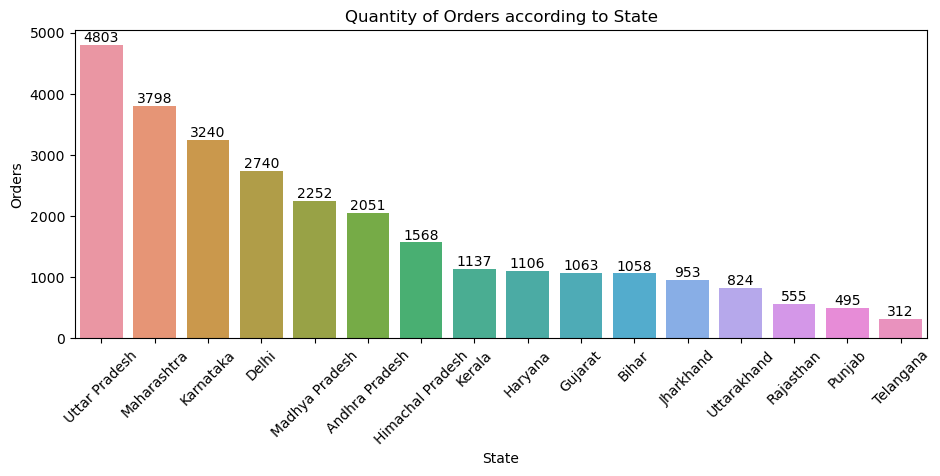

In [25]:
st_orders = df.groupby(["State"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False)
plt.figure(figsize=(11,4))
fig = sns.barplot(data = st_orders, x="State", y="Orders")
plt.xticks(rotation=45)
plt.title("Quantity of Orders according to State")
for bars in fig.containers:
    fig.bar_label(bars)

In [26]:
st_amount = df.groupby(["State"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
st_amount

,State,Amount
14,Uttar Pradesh,19346055
10,Maharashtra,14404467
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4217871
1,Bihar,4014669
3,Gujarat,3938159


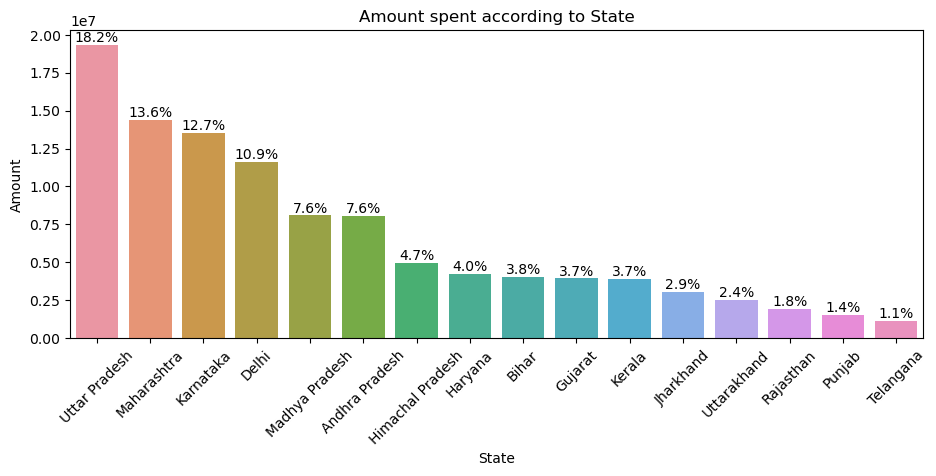

In [27]:
plt.figure(figsize=(11,4))
fig = sns.barplot(data = st_amount, x="State", y="Amount")
plt.xticks(rotation=45)
plt.title("Amount spent according to State")
total = sum(st_amount["Amount"])
for i, v in enumerate(st_amount["Amount"]):
    percentage = v/total *100
    plt.text(i, v, f'{percentage:.1f}%', ha="center", va="bottom")

- Above two plots shows that top 5 states (Uttar Pradesh, Maharashtra, Karnataka, Delhi, Madhya Pradesh) that highly orders and spent amount in online purchasing products at diwali festival. 

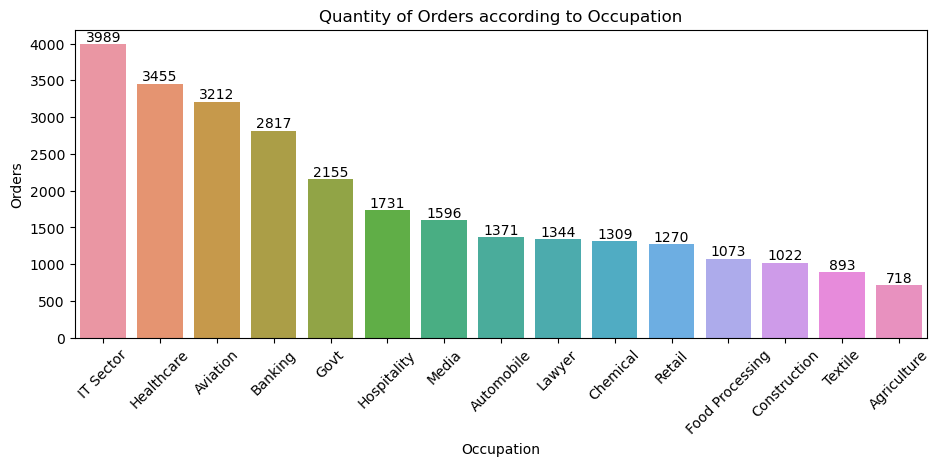

In [28]:
ocp_orders = df.groupby(["Occupation"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False)
plt.figure(figsize=(11,4))
fig = sns.barplot(data = ocp_orders, x="Occupation", y="Orders")
plt.xticks(rotation=45)
plt.title("Quantity of Orders according to Occupation")
for bars in fig.containers:
    fig.bar_label(bars)

In [29]:
ocp_amount = df.groupby(["Occupation"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
ocp_amount

,Occupation,Amount
10,IT Sector,14741862
8,Healthcare,13034586
2,Aviation,12599994
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6337633
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


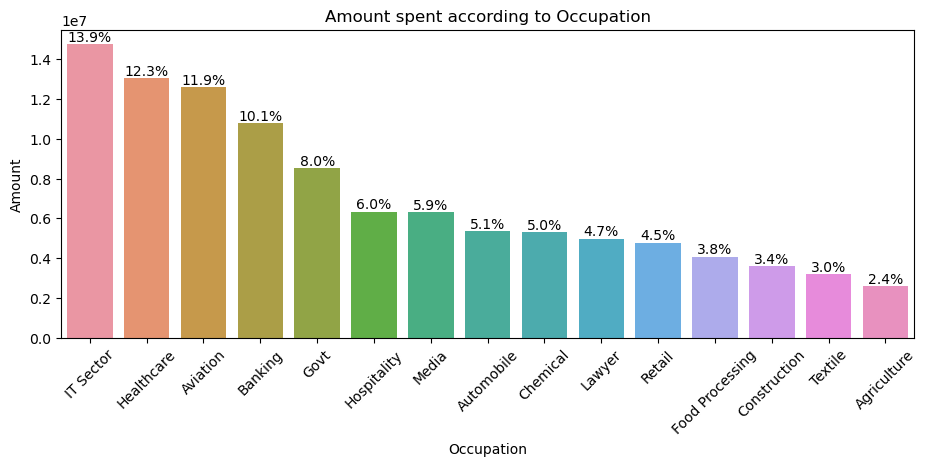

In [30]:
plt.figure(figsize=(11,4))
fig = sns.barplot(data = ocp_amount, x="Occupation", y="Amount")
plt.xticks(rotation=45)
plt.title("Amount spent according to Occupation")
total = sum(ocp_amount["Amount"])
for i, v in enumerate(ocp_amount["Amount"]):
    percentage = v/total *100
    plt.text(i, v, f'{percentage:.1f}%', ha="center", va="bottom")

- Above two plots shows that top 5 Occupation (IT Sector, Healthcare, Aviation, Banking, Gobt) that highly orders and spent amount in online purchasing products at diwali festival.

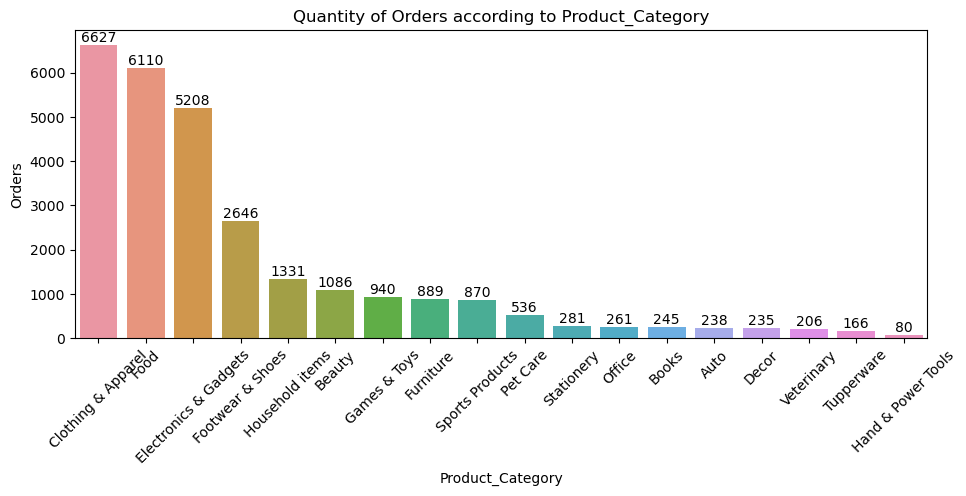

In [31]:
pc_orders = df.groupby(["Product_Category"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False)
plt.figure(figsize=(11,4))
fig = sns.barplot(data = pc_orders, x="Product_Category", y="Orders")
plt.xticks(rotation=45)
plt.title("Quantity of Orders according to Product_Category")
for bars in fig.containers:
    fig.bar_label(bars)

In [32]:
pc_amount = df.groupby(["Product_Category"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
pc_amount

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16484472
5,Electronics & Gadgets,15607657
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1935041
15,Stationery,1676051


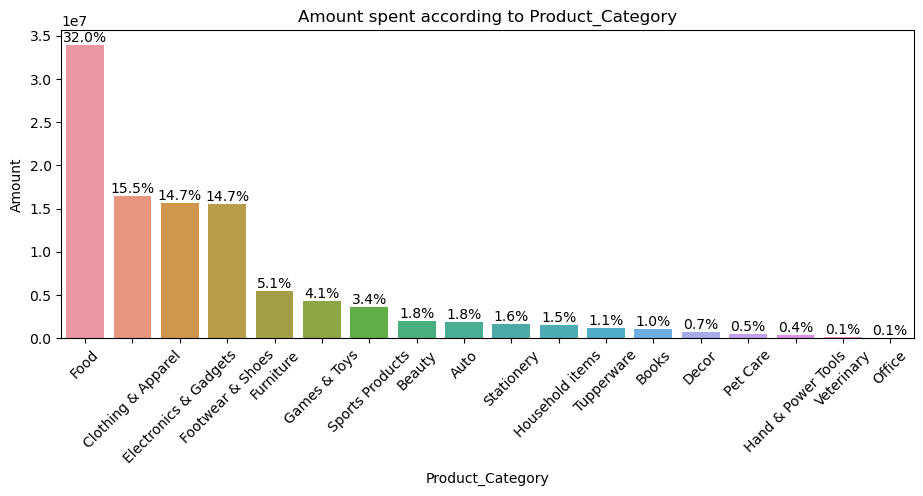

In [33]:
plt.figure(figsize=(11,4))
fig = sns.barplot(data = pc_amount, x="Product_Category", y="Amount")
plt.xticks(rotation=45)
plt.title("Amount spent according to Product_Category")
total = sum(pc_amount["Amount"])
for i, v in enumerate(pc_amount["Amount"]):
    percentage = v/total *100
    plt.text(i, v, f'{percentage:.1f}%', ha="center", va="bottom")

- Above two plots shows that top 5 Product_Category (Food, Clothing & Apparel, Electronics & Gadgets, Footwear & Shoes, Furniture) that highly orders and spent amount in online purchasing products at diwali festival.